In [1]:
import numpy as np
import math
import matplotlib.pyplot as plt

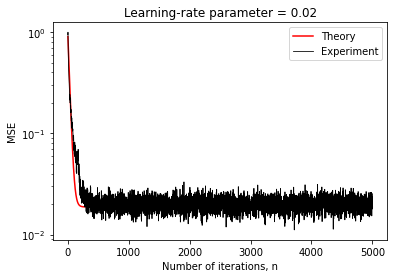

In [7]:
variance = 0.02
a = 0.99
xi0 = 0

#Change the learningRate variable for each test
learningRate = 0.02

sigu2 = 0.93627
t = np.asarray(range(1, 5001))
error_full = None

for iteration in range(100):
    # Produce the dataset using generative model: x(n) = a*x(n-1) + epsilon(n)
    mean, std_dvt = 0, math.sqrt(variance)
    epsilon = np.random.normal(mean, std_dvt, size=1000000)

    x = [_ for _ in range(1000000)]
    x[0] = epsilon[0]

    for i in range(1, 1000000):
        if i == 1:
            x[1] = a*x[0] + epsilon[1]
        else:
            x[i] = a*x[i-1] + epsilon[i]

    x = np.asarray(x).reshape(1000000, 1)
    x = x[-5000:]

    # Initialize weight matrix
    w = 0
    w0 = []
    n = 0
    w0.append(w)
    w0 = np.asarray(w0)

    # Process first iteration. Predict, compute error, and compute weight
    # Compute error: e(n) = d(n) - transpose(w) * x(n)
    # Compute weight: w(n+1) = w(n) + learningRate * x(n) * e(n)
    x_predict = np.zeros((5000, 1))
    error = np.zeros((5000, 1))

    x_predict[n, :] = xi0 * w
    error[n, :] = x[n, :] - x_predict[n, :]
    w = w + learningRate * error[n, :].T * xi0

    # Loop through the rest of the iterations and compute the corresponding weights for each iteration
    # Use the same formulas above
    N = x.shape[0]
    for n in range(1, N):
        w0 = np.append(w0, w)
        x_predict[n, :] = x[n-1, :] * w
        error[n, :] = x[n, :] - x_predict[n, :]
        w = w + learningRate * error[n, :].T * x[n-1, :]

    if iteration == 0:
        error_full = np.copy(error)
    else:
        error_full = np.concatenate((error_full, np.copy(error)), axis=0)

# Reshape the final error
error_full = error_full.reshape((100, 5000))

# LMS learning curve: formula (3.63) in textbook where the learning-rate parameter learningRate is small
Jn = sigu2*(1-a**2)*(1+(learningRate/2)*sigu2) + sigu2*(a**2+(learningRate/2)*(a**2)*sigu2-0.5*learningRate*sigu2)*(1-learningRate*sigu2)**(2*t)

# LMS mean square error: formula (under formula (3.62) in textbook)
J_mean = np.mean(np.square(error_full), axis=0)

# Plot the desired results
plt.semilogy(Jn, 'r-', label='Theory')
plt.semilogy(J_mean, 'k-', label='Experiment', linewidth=0.8)
plt.legend(loc="upper right")
plt.title('Learning-rate parameter = ' + str(learningRate))
plt.xlabel("Number of iterations, n")
plt.ylabel("MSE")
plt.show()
